# 10.7. PROJECT. Оценка эффективности новой фичи

## Задачи:

Для понимания эффективности новой фичи нужно:
1. Посчитать показатели Retention Rate седьмого дня и ARPPU за два периода: до и после внедрения фичи.
2. Сформировать выводы по анализу.


! ЗАМЕТКА :

В данном документе для удобства и лучшего визуального восприятия используется номерная разметка и текст формата Markdown ("не запущенный код" текста)

Для удобства проверки вопросов 1, 2, поставленных в проекте можно сразу перейти к пп. ## 5.1, 5.2, 5.3 соответственно. 

#### Загружаем библиотеки

In [1]:
! pip install psycopg2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## 1.1
#### Сколько пользователей зарегистрировалось в мае - до внедрения фичи

Создадим функцию 
##### getRegisteredUsersCount_May() 
для определения количества зарегистрировавшихся пользователей в каждый день мая (до внедрения фичи), в разрезе 
##### registration_date 
— дней регистрации

In [3]:
# Функция для количества зарегистрировавшихся пользователей в каждый день мая - ДО ВНЕДРЕНИЯ ФИЧИ:

def getRegisteredUsersCount_May():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count_may
    FROM case9.registration r
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

# Используем конструкцию pd.DataFrame(getRegisteredUsersCount_May()), которая позволяет выполнить функцию запроса, 
# а затем записать полученные данные в датафрейм registered_users_count_may.

registered_users_count_may = pd.DataFrame(getRegisteredUsersCount_May())
# registered_users_count_may

In [4]:
# Смотрим информацию о полученном датафрейме
registered_users_count_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   registration_date           31 non-null     object
 1   registered_users_count_may  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [5]:
# Преобразовываем колонку registration_date с типом object в тип datetime с помощью метода pd.to_datetime():
registered_users_count_may['registration_date'] = pd.to_datetime(registered_users_count_may['registration_date'])
registered_users_count_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   registration_date           31 non-null     datetime64[ns]
 1   registered_users_count_may  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [6]:
# Оценим первые строки датафрейма registered_users_count_may:
registered_users_count_may.head()

,registration_date,registered_users_count_may
0,2019-05-01,6516
1,2019-05-02,5309
2,2019-05-03,6266
3,2019-05-04,8639
4,2019-05-05,9787


In [7]:
# Посмотрим количество пользователей, зарегистрировавшихся в мае:
registered_users_count_may.registered_users_count_may.sum()

188943

## 1.2
#### Сколько пользователей зарегистрировалось в июне - после внедрения фичи

Создадим функцию
##### getRegisteredUsersCount_June() 
для определения количества зарегистрировавшихся пользователей в каждый день июня (после внедрения фичи), в разрезе 
##### registration_date 
— дней регистрации

In [8]:
# Функция для количества зарегистрировавшихся пользователей в каждый день июня - ПОСЛЕ ВНЕДРЕНИЯ ФИЧИ:

def getRegisteredUsersCount_June():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count_june
    FROM case9.registration r
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

# Используем конструкцию pd.DataFrame(getRegisteredUsersCount_June()), которая позволяет выполнить функцию запроса, 
# а затем записать полученные данные в датафрейм registered_users_count_june.

registered_users_count_june = pd.DataFrame(getRegisteredUsersCount_June()) 
# registered_users_count_june

In [9]:
# Смотрим информацию о полученном датафрейме
registered_users_count_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   registration_date            30 non-null     object
 1   registered_users_count_june  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [10]:
# Преобразовываем колонку registration_date с типом object в тип datetime с помощью метода pd.to_datetime()
registered_users_count_june['registration_date'] = pd.to_datetime(registered_users_count_june['registration_date'])
registered_users_count_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   registration_date            30 non-null     datetime64[ns]
 1   registered_users_count_june  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [11]:
# Оценим первые строки датафрейма registered_users_count_june:
registered_users_count_june.head()

,registration_date,registered_users_count_june
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


In [12]:
# Посмотрим количество пользователей, зарегистрировавшихся в июне:
registered_users_count_june.registered_users_count_june.sum()

100423

## 1.3 - Предварительный вывод 1:
Таким образом, количество зарегистрировавшихся пользователей в мае (до внедрения фичи) составило 188943, а количество зарегистрировавшихся пользователей в июне (после внедрения фичи) составило 100423. Данные показатели помогут нам рассчитать показатели Retention Rate седьмого дня и ARPPU за оба периода: до и после внедрения фичи (Задача 1).

## 2.1 
#### Сколько пользователей вернулось в сервис в мае - до внедрения фичи

Посчитаем количество активных пользователей в мае в разрезе когорт, где в качестве когорты будет выступать дата регистрации: сначала получим данные об активных пользователях из базы и подсчитаем по дням количество активных пользователей 
##### active_users_count_may
с указанием даты регистрации 
##### registration_date
. Для этого создадим функцию 
##### getActiveUsersCountWithCohorts_May() 
и запишем данные, полученные с помощью этой функции, в датафрейм 
##### active_users_count_with_cohorts_may
.

In [13]:
def getActiveUsersCountWithCohorts_May():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count_may
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data 
active_users_count_with_cohorts_may = pd.DataFrame(getActiveUsersCountWithCohorts_May())
# active_users_count_with_cohorts_may

In [14]:
# Посмотрим на информацию о датафрейме active_users_count_with_cohorts_may
active_users_count_with_cohorts_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   activity_date           961 non-null    object
 1   registration_date       961 non-null    object
 2   active_users_count_may  961 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [15]:
# Преобразовываем колонки activity_date, registration_date с типом object в тип datetime с помощью метода pd.to_datetime()
for col in ['activity_date', 'registration_date']:
    active_users_count_with_cohorts_may[col] = pd.to_datetime(active_users_count_with_cohorts_may[col])
active_users_count_with_cohorts_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   activity_date           961 non-null    datetime64[ns]
 1   registration_date       961 non-null    datetime64[ns]
 2   active_users_count_may  961 non-null    int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 22.6 KB


In [16]:
# Оценим первые строки датафрейма active_users_count_with_cohorts_may:
active_users_count_with_cohorts_may.head()

,activity_date,registration_date,active_users_count_may
0,2019-05-01,2019-05-01,2590
1,2019-05-02,2019-05-01,2146
2,2019-05-02,2019-05-02,2049
3,2019-05-03,2019-05-01,1637
4,2019-05-03,2019-05-02,1817


In [17]:
# Посмотрим количество активных пользователей, зарегистрировавшихся в мае:
active_users_count_with_cohorts_may.active_users_count_may.sum()

629192

## 2.2
#### Сколько пользователей вернулось в сервис в июне - после внедрения фичи

Посчитаем количество активных пользователей в июне в разрезе когорт, где в качестве когорты будет выступать дата регистрации: сначала получим данные об активных пользователях из базы и подсчитаем по дням количество активных пользователей 
##### active_users_count_june
с указанием даты регистрации 
##### registration_date
. Для этого создадим функцию 
##### getActiveUsersCountWithCohorts_June() 
и запишем данные, полученные с помощью этой функции, в датафрейм 
##### active_users_count_with_cohorts_june
.

In [18]:
def getActiveUsersCountWithCohorts_June():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count_june
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data 
active_users_count_with_cohorts_june = pd.DataFrame(getActiveUsersCountWithCohorts_June())
# active_users_count_with_cohorts_june

In [19]:
# Посмотрим на информацию о датафрейме active_users_count_with_cohorts_june
active_users_count_with_cohorts_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   activity_date            930 non-null    object
 1   registration_date        930 non-null    object
 2   active_users_count_june  930 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.9+ KB


In [20]:
# Преобразовываем колонки activity_date, registration_date с типом object в тип datetime с помощью метода pd.to_datetime()
for col in ['activity_date', 'registration_date']:
    active_users_count_with_cohorts_june[col] = pd.to_datetime(active_users_count_with_cohorts_june[col])
active_users_count_with_cohorts_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   activity_date            930 non-null    datetime64[ns]
 1   registration_date        930 non-null    datetime64[ns]
 2   active_users_count_june  930 non-null    int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 21.9 KB


In [21]:
# Оценим первые строки датафрейма active_users_count_with_cohorts_june:
active_users_count_with_cohorts_june.head()

,activity_date,registration_date,active_users_count_june
0,2019-06-01,2019-06-01,1651
1,2019-06-02,2019-06-01,1429
2,2019-06-02,2019-06-02,1933
3,2019-06-03,2019-06-01,1021
4,2019-06-03,2019-06-02,1550


In [22]:
# Посмотрим количество активных пользователей, зарегистрировавшихся в июне:
active_users_count_with_cohorts_june.active_users_count_june.sum()

331218

## 2.3 - Предварительный вывод 2:
Количество активных пользователей в двух датафреймах одинаковое - 629192

## 3.1
#### Теперь объединим ранее полученные датафреймы за май месяц чтобы рассчитать процент вернувшихся пользователей на определённый день - retention_rate_may

Объединим таблицу с количеством пользователей, которые изначально были в когортах —
##### registered_users_count_may 
и таблицу с количеством активных пользователей по дням в каждой когорте —
##### active_users_count_with_cohorts_may
и запишем сводные данные в датафрейм 
##### retention_table_may

In [23]:
# Объединим таблицы по колонке 'registration_date'
retention_table_may = active_users_count_with_cohorts_may.merge(registered_users_count_may, on = 'registration_date', 
                                                                how = 'left')
# Оценим первые строки датафрейма retention_table_may
retention_table_may.head()

,activity_date,registration_date,active_users_count_may,registered_users_count_may
0,2019-05-01,2019-05-01,2590,6516
1,2019-05-02,2019-05-01,2146,6516
2,2019-05-02,2019-05-02,2049,5309
3,2019-05-03,2019-05-01,1637,6516
4,2019-05-03,2019-05-02,1817,5309


In [24]:
# Добавим дополнительную колонку retention_rate_may, в которой рассчитаем показатель Retention Rate в мае
retention_table_may['retention_rate_may'] = retention_table_may.active_users_count_may / retention_table_may.registered_users_count_may

# Оценим первые строки обновлённого датафрейма
retention_table_may.head()

,activity_date,registration_date,active_users_count_may,registered_users_count_may,retention_rate_may
0,2019-05-01,2019-05-01,2590,6516,0.397483
1,2019-05-02,2019-05-01,2146,6516,0.329343
2,2019-05-02,2019-05-02,2049,5309,0.385948
3,2019-05-03,2019-05-01,1637,6516,0.251228
4,2019-05-03,2019-05-02,1817,5309,0.342249


In [25]:
retention_table_may.retention_rate_may.mean()

0.10682055618481642

Теперь чтобы рассчитать Retention Rate на определенный день относительно даты регистрации в сервисе, добавим в таблицу retention_table_may дополнительную колонку 
##### 'lifetime_may' 
чтобы определить какое количество дней прошло с момента регистрации до определённого дня активности (до внедрения фичи) - timedelta. 
Значения в колонке 'lifetime_may' с типом timedelta разделим на константу 
##### np.timedelta64(1,'D') 
чтобы получить целое количество дней, а также приведём тип к целому числу:

In [26]:
retention_table_may['lifetime_may'] = retention_table_may['activity_date'] - retention_table_may['registration_date']
retention_table_may['lifetime_may'] = retention_table_may['lifetime_may'] / np.timedelta64(1, 'D')
retention_table_may['lifetime_may'] = retention_table_may['lifetime_may'].astype(int)
# retention_table_may

# Оценим первые строки колонки 'lifetime_may' обновлённого датафрейма 'retention_table_may'
retention_table_may['lifetime_may'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime_may, dtype: int64

## 3.2
#### Теперь объединим ранее полученные датафреймы за июнь месяц чтобы рассчитать процент вернувшихся пользователей на определённый день - retention_rate (после внедрения фичи)

Объединим таблицу с количеством пользователей, которые изначально были в когортах —
##### registered_users_count_june 
и таблицу с количеством активных пользователей по дням в каждой когорте —
##### active_users_count_with_cohorts_june
и запишем сводные данные в датафрейм 
##### retention_table_june

In [27]:
# Объединим таблицы по колонке 'registration_date'
retention_table_june = active_users_count_with_cohorts_june.merge(registered_users_count_june, on = 'registration_date', 
                                                                how = 'left')
# Оценим первые строки датафрейма retention_table_june
retention_table_june.head()

,activity_date,registration_date,active_users_count_june,registered_users_count_june
0,2019-06-01,2019-06-01,1651,4833
1,2019-06-02,2019-06-01,1429,4833
2,2019-06-02,2019-06-02,1933,5255
3,2019-06-03,2019-06-01,1021,4833
4,2019-06-03,2019-06-02,1550,5255


In [28]:
# Добавим дополнительную колонку retention_rate_june, в которой рассчитаем показатель Retention Rate в июне
retention_table_june['retention_rate_june'] = retention_table_june.active_users_count_june / retention_table_june.registered_users_count_june

# Оценим первые строки обновлённого датафрейма
retention_table_june.head()

,activity_date,registration_date,active_users_count_june,registered_users_count_june,retention_rate_june
0,2019-06-01,2019-06-01,1651,4833,0.341610
1,2019-06-02,2019-06-01,1429,4833,0.295676
2,2019-06-02,2019-06-02,1933,5255,0.367840
3,2019-06-03,2019-06-01,1021,4833,0.211256
4,2019-06-03,2019-06-02,1550,5255,0.294957


In [29]:
retention_table_june.retention_rate_june.mean()

0.10595484507136199

Теперь чтобы рассчитать Retention Rate на определенный день относительно даты регистрации в сервисе (после внедрения фичи), добавим в таблицу retention_table_june дополнительную колонку 
##### 'lifetime_june' 
чтобы определить какое количество дней прошло с момента регистрации до определённого дня активности - timedelta. 
Значения в колонке 'lifetime_june' с типом timedelta разделим на константу 
##### np.timedelta64(1,'D') 
чтобы получить целое количество дней, а также приведём тип к целому числу:

In [30]:
retention_table_june['lifetime_june'] = retention_table_june['activity_date'] - retention_table_june['registration_date']
retention_table_june['lifetime_june'] = retention_table_june['lifetime_june'] / np.timedelta64(1, 'D')
retention_table_june['lifetime_june'] = retention_table_june['lifetime_june'].astype(int)
# retention_table_june

# Оценим первые строки колонки 'lifetime_june' обновлённого датафрейма 'retention_table_june'
retention_table_june['lifetime_june'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime_june, dtype: int64

## 3.3 - Предварительный вывод 3:
Средний показатель Retention Rate в мае - 10.682% не на много, но больше аналогичного показателя за июнь - 10.595%

## 4.1
#### Теперь сформируем сводную таблицу, которая позволяет для каждой когорты в мае оценить Retention Rate за порядковый день активности.

In [31]:
retention_pivot_may = retention_table_may.pivot_table(index='registration_date', columns='lifetime_may', 
                                                      values='retention_rate_may', aggfunc='sum')
# retention_pivot_may

##### При необходимости мы можем визуализировать полученную таблицу с помощью heatmap в библиотеке seaborn:

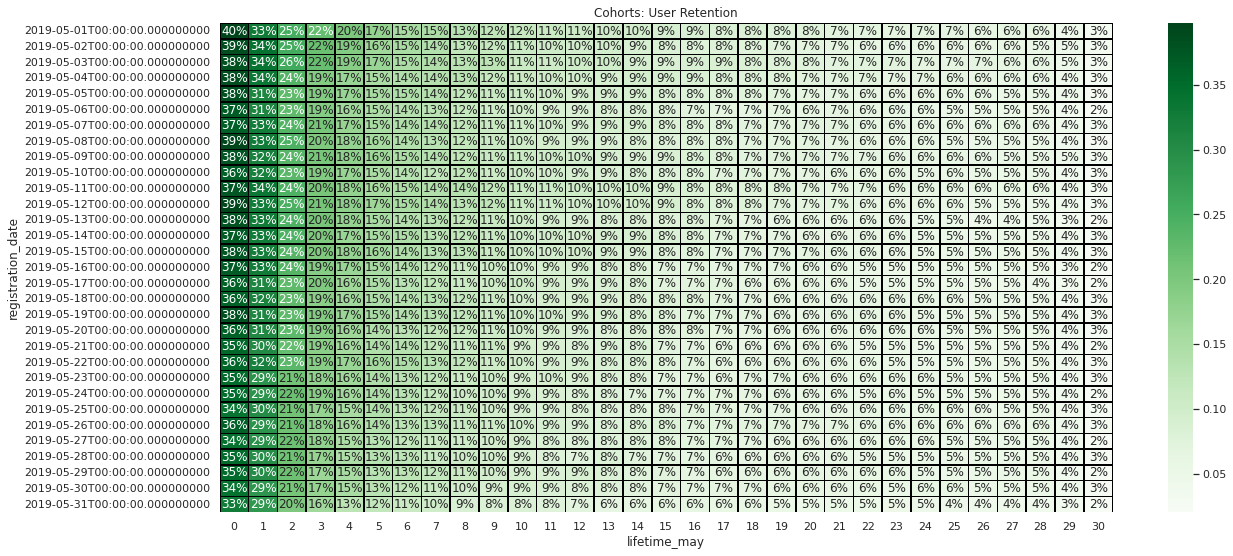

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_may, mask=retention_pivot_may.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens")

##### Теперь, с помощью retention_pivot_may визуализируем как в зависимости от когорты изменяется Retention Rate на 7-ой день.

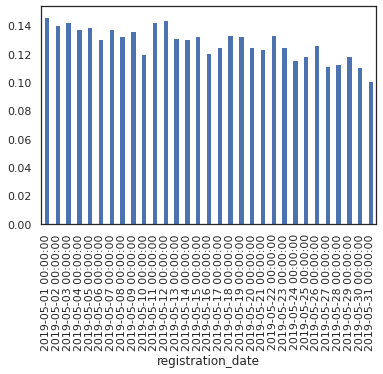

In [33]:
retention_pivot_may[7].plot.bar()

##### Мы видим, что Retention Rate на 7-ой день для дневных когорт мая неравномерно, но снижается с максимальных значений немногим выше 14% до значений около 10%

## 4.2
#### Теперь сформируем сводную таблицу, которая позволяет для каждой когорты в июне оценить Retention Rate за порядковый день активности.

In [34]:
retention_pivot_june = retention_table_june.pivot_table(index='registration_date', columns='lifetime_june', 
                                                      values='retention_rate_june', aggfunc='sum')
# retention_pivot_june

##### При необходимости мы можем визуализировать полученную таблицу с помощью heatmap в библиотеке seaborn:

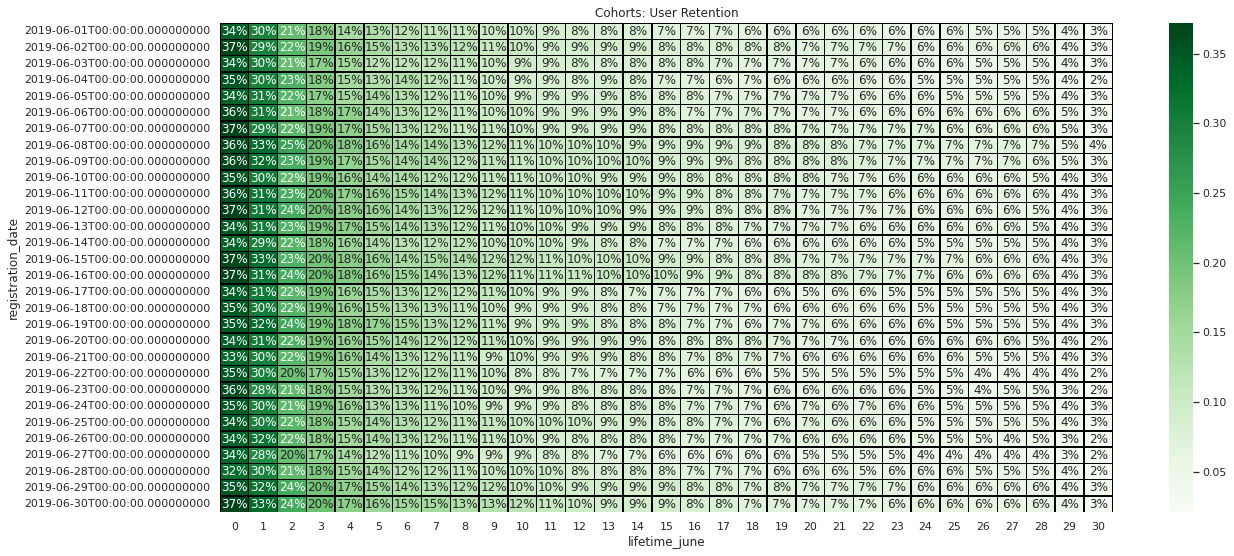

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_june, mask=retention_pivot_june.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens")

##### Теперь, с помощью retention_pivot_june визуализируем как в зависимости от когорты изменяется Retention Rate на 7-ой день.

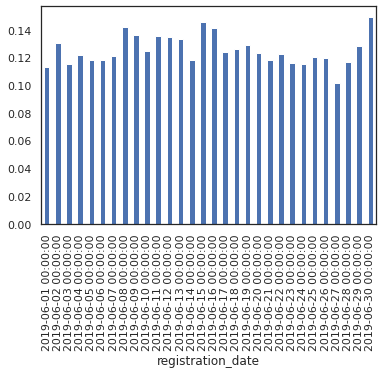

In [36]:
retention_pivot_june[7].plot.bar()

## 4.3
##### Найдём относительное изменение Retention Rate на 7-ой день для когорты 30-го июня 2019 года (после внедрения фичи) относительно когорты 31-го мая 2019 года (до внедрения фичи)

In [37]:
retention_pivot_june[7]['2019-06-30']/retention_pivot_may[7]['2019-05-31']

1.48219154368806

## 4.4 - Предварительный вывод 4:
Как мы видим, Retention Rate когорты 30-го июня 2019 года на 7-ой день составляет около 148.219% относительно аналогичного показателя когорты 31 мая 2019 года, т.е. после внедрения фичи Retention Rate увеличился - это может говорить об эффективности внедрённой фичи, благодаря которой пользователи стали чаще заходить в личный кабинет.

## 5.1
#### На данном этапе посчитаем выручку по дням с платящего пользователя - ARPPU (Average Revenue Per Paying User) за май - до внедрения фичи

Для этого создадим функцию 
##### getRevenue_May() 
чтобы получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в мае 2019 года, после чего получим данные по запросу и запишем в датафрейм 
##### revenue_may

In [38]:
def getRevenue_May():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue_may, sum(re.revenue) as revenue_may
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data
revenue_may = pd.DataFrame(getRevenue_May())
# revenue_may

In [39]:
# Посмотрим на основную информацию по колонкам датафрейма revenue_may
revenue_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          912 non-null    object 
 1   registration_date             912 non-null    object 
 2   users_count_with_revenue_may  912 non-null    int64  
 3   revenue_may                   912 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6+ KB


In [40]:
# Произведём преобразование колонок с типом object к datetime
for col in ['date','registration_date']:
    revenue_may[col] = pd.to_datetime(revenue_may[col])
revenue_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          912 non-null    datetime64[ns]
 1   registration_date             912 non-null    datetime64[ns]
 2   users_count_with_revenue_may  912 non-null    int64         
 3   revenue_may                   912 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 28.6 KB


In [41]:
# Посмотрим на первые строки датафрейма revenue_may
revenue_may.head()

,date,registration_date,users_count_with_revenue_may,revenue_may
0,2019-05-01,2019-05-01,1672,2357.590
1,2019-05-02,2019-05-01,1420,514.679
2,2019-05-02,2019-05-02,1367,1629.140
3,2019-05-03,2019-05-01,1048,390.952
4,2019-05-03,2019-05-02,1164,533.608


In [42]:
# Посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся в мае
revenue_may.revenue_may.sum()

121998.29795000001

In [43]:
# Определим количество зарегистрировавшихся пользователей в мае на основе датафрейма registered_users_count_may
registered_users_count_may.registered_users_count_may.sum()

188943

In [44]:
# Рассчитаем среднюю выручку за месяц с пользователей, зарегистрировавшихся в мае
revenue_may.revenue_may.sum() / registered_users_count_may.registered_users_count_may.sum()

0.6456883713606749

Объединим данные из датафрейма 
##### revenue_may 
с данными из датафрейма 
##### retention_table_may 
в новый датафрейм 
##### retention_table_with_revenue_may

In [45]:
# В revenue_may изменим название колонки date на activity_date чтобы объединить датафреймы по одинаковому названию колонок
revenue_may = revenue_may.rename(columns={'date':'activity_date'})
# revenue_may

In [46]:
retention_table_with_revenue_may = retention_table_may.merge(revenue_may, on = ['registration_date', 'activity_date'], 
                                                            how = 'left')
# retention_table_with_revenue_may

In [47]:
# Посмотрим на первые строки получившегося объединённого датафрейма
retention_table_with_revenue_may.head()

,activity_date,registration_date,active_users_count_may,registered_users_count_may,retention_rate_may,lifetime_may,users_count_with_revenue_may,revenue_may
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672.0,2357.590
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420.0,514.679
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367.0,1629.140
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048.0,390.952
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164.0,533.608


In [48]:
retention_table_with_revenue_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   activity_date                 961 non-null    datetime64[ns]
 1   registration_date             961 non-null    datetime64[ns]
 2   active_users_count_may        961 non-null    int64         
 3   registered_users_count_may    961 non-null    int64         
 4   retention_rate_may            961 non-null    float64       
 5   lifetime_may                  961 non-null    int64         
 6   users_count_with_revenue_may  912 non-null    float64       
 7   revenue_may                   912 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 67.6 KB


После объединения видим, что по колонкам 
##### users_count_with_revenue_may 
и 
##### revenue_may 
есть пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей.

In [49]:
# Произведём замену пропущенных значений на 0
for col in ['revenue_may','users_count_with_revenue_may']:
    retention_table_with_revenue_may[col] = retention_table_with_revenue_may[col].fillna(0)

In [50]:
# Преобразуем тип в колонке users_count_with_revenue_may в целочисленный
retention_table_with_revenue_may['users_count_with_revenue_may'] = retention_table_with_revenue_may\
                                                                    ['users_count_with_revenue_may'].astype(int)
retention_table_with_revenue_may

,activity_date,registration_date,active_users_count_may,registered_users_count_may,retention_rate_may,lifetime_may,users_count_with_revenue_may,revenue_may
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672,2357.59000
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420,514.67900
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367,1629.14000
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048,390.95200
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164,533.60800
...,...,...,...,...,...,...,...,...
956,2019-06-28,2019-05-30,219,5239,0.041802,29,142,4.56175
957,2019-06-28,2019-05-31,199,4724,0.042125,28,131,77.18220
958,2019-06-29,2019-05-30,138,5239,0.026341,30,90,68.09330
959,2019-06-29,2019-05-31,155,4724,0.032811,29,100,6.61193


In [51]:
# Считаем Retention Rate 7-го дня в мае:

retention_day7_with_revenue_may = retention_table_with_revenue_may[retention_table_with_revenue_may.lifetime_may == 7]
# retention_day7_with_revenue_may
retention_day7_with_revenue_may.active_users_count_may.sum() / retention_day7_with_revenue_may.registered_users_count_may.sum()

0.12933000957960866

In [52]:
# Считаем показатель ARPPU - добавляем колонку 'arppu' в датафрейм retention_table_with_revenue_may
retention_table_with_revenue_may['arppu'] = retention_table_with_revenue_may.revenue_may / retention_table_with_revenue_may.users_count_with_revenue_may
retention_table_with_revenue_may['arppu']

0      1.410042
1      0.362450
2      1.191763
3      0.373046
4      0.458426
         ...   
956    0.032125
957    0.589177
958    0.756592
959    0.066119
960         NaN
Name: arppu, Length: 961, dtype: float64

In [53]:
# Считаем средний ARPPU в мае:

retention_table_with_revenue_may_sum = retention_table_with_revenue_may.revenue_may.sum() / \
                                        retention_table_with_revenue_may.users_count_with_revenue_may.sum()
retention_table_with_revenue_may_sum

0.30612457926102504

## 5.2
#### Теперь посчитаем выручку по дням с платящего пользователя - ARPPU (Average Revenue Per Paying User) за июнь - после внедрения фичи

Для этого создадим функцию 
##### getRevenue_June() 
чтобы получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в июне 2019 года, после чего получим данные по запросу и запишем в датафрейм 
##### revenue_june

In [56]:
def getRevenue_June():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue_june, sum(re.revenue) as revenue_june
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data
revenue_june = pd.DataFrame(getRevenue_June())
# revenue_june

In [57]:
# Посмотрим на основную информацию по колонкам датафрейма revenue_june
revenue_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           833 non-null    object 
 1   registration_date              833 non-null    object 
 2   users_count_with_revenue_june  833 non-null    int64  
 3   revenue_june                   833 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.2+ KB


In [58]:
# Произведём преобразование колонок с типом object к datetime
for col in ['date','registration_date']:
    revenue_june[col] = pd.to_datetime(revenue_june[col])
revenue_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           833 non-null    datetime64[ns]
 1   registration_date              833 non-null    datetime64[ns]
 2   users_count_with_revenue_june  833 non-null    int64         
 3   revenue_june                   833 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 26.2 KB


In [59]:
# Посмотрим на первые строки датафрейма revenue_june
revenue_june.head()

,date,registration_date,users_count_with_revenue_june,revenue_june
0,2019-06-01,2019-06-01,1082,1611.860
1,2019-06-02,2019-06-01,928,317.738
2,2019-06-02,2019-06-02,1257,1305.220
3,2019-06-03,2019-06-01,623,192.273
4,2019-06-03,2019-06-02,1008,554.859


In [60]:
# Посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся в июне
revenue_june.revenue_june.sum()

79685.877867

In [61]:
# Определим количество зарегистрировавшихся пользователей в июне на основе датафрейма registered_users_count_june
registered_users_count_june.registered_users_count_june.sum()

100423

In [62]:
# Рассчитаем среднюю выручку за месяц с пользователей, зарегистрировавшихся в июне
revenue_june.revenue_june.sum() / registered_users_count_june.registered_users_count_june.sum()

0.7935022640928872

Объединим данные из датафрейма 
##### revenue_june 
с данными из датафрейма 
##### retention_table_june 
в новый датафрейм 
##### retention_table_with_revenue_june

In [63]:
# В revenue_june изменим название колонки date на activity_date чтобы объединить датафреймы по одинаковому названию колонок
revenue_june = revenue_june.rename(columns={'date':'activity_date'}) 
# revenue_june

In [64]:
retention_table_with_revenue_june = retention_table_june.merge(revenue_june, on = ['registration_date', 'activity_date'], 
                                                            how = 'left')
# retention_table_with_revenue_june

In [65]:
# Посмотрим на первые строки получившегося объединённого датафрейма
retention_table_with_revenue_june.head()

,activity_date,registration_date,active_users_count_june,registered_users_count_june,retention_rate_june,lifetime_june,users_count_with_revenue_june,revenue_june
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.860
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.738
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.220
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.273
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.859


In [66]:
retention_table_with_revenue_june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   activity_date                  930 non-null    datetime64[ns]
 1   registration_date              930 non-null    datetime64[ns]
 2   active_users_count_june        930 non-null    int64         
 3   registered_users_count_june    930 non-null    int64         
 4   retention_rate_june            930 non-null    float64       
 5   lifetime_june                  930 non-null    int64         
 6   users_count_with_revenue_june  833 non-null    float64       
 7   revenue_june                   833 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 65.4 KB


После объединения видим, что по колонкам 
##### users_count_with_revenue_june 
и 
##### revenue_june 
есть пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей.

In [67]:
# Произведём замену пропущенных значений на 0
for col in ['revenue_june','users_count_with_revenue_june']:
    retention_table_with_revenue_june[col] = retention_table_with_revenue_june[col].fillna(0)

In [68]:
# Преобразуем тип в колонке users_count_with_revenue_june в целочисленный
retention_table_with_revenue_june['users_count_with_revenue_june'] = retention_table_with_revenue_june\
                                                                    ['users_count_with_revenue_june'].astype(int)
retention_table_with_revenue_june

,activity_date,registration_date,active_users_count_june,registered_users_count_june,retention_rate_june,lifetime_june,users_count_with_revenue_june,revenue_june
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082,1611.86000
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928,317.73800
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257,1305.22000
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623,192.27300
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008,554.85900
...,...,...,...,...,...,...,...,...
925,2019-07-28,2019-06-29,129,2968,0.043464,29,86,29.05720
926,2019-07-28,2019-06-30,198,3301,0.059982,28,0,0.00000
927,2019-07-29,2019-06-29,89,2968,0.029987,30,62,5.45989
928,2019-07-29,2019-06-30,144,3301,0.043623,29,100,10.05400


In [69]:
# Считаем Retention Rate 7-го дня в июне:

retention_day7_with_revenue_june = retention_table_with_revenue_june[retention_table_with_revenue_june.lifetime_june == 7]
# retention_day7_with_revenue_june
retention_day7_with_revenue_june.active_users_count_june.sum() / retention_day7_with_revenue_june.registered_users_count_june.sum()

0.12560867530346634

In [70]:
# Считаем показатель ARPPU - добавляем колонку 'arppu' в датафрейм retention_table_with_revenue_june
retention_table_with_revenue_june['arppu'] = retention_table_with_revenue_june.revenue_june / \
                                            retention_table_with_revenue_june.users_count_with_revenue_june
retention_table_with_revenue_june

,activity_date,registration_date,active_users_count_june,registered_users_count_june,retention_rate_june,lifetime_june,users_count_with_revenue_june,revenue_june,arppu
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082,1611.86000,1.489704
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928,317.73800,0.342390
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257,1305.22000,1.038361
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623,192.27300,0.308624
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008,554.85900,0.550455
...,...,...,...,...,...,...,...,...,...
925,2019-07-28,2019-06-29,129,2968,0.043464,29,86,29.05720,0.337874
926,2019-07-28,2019-06-30,198,3301,0.059982,28,0,0.00000,NaN
927,2019-07-29,2019-06-29,89,2968,0.029987,30,62,5.45989,0.088063
928,2019-07-29,2019-06-30,144,3301,0.043623,29,100,10.05400,0.100540


In [71]:
# Считаем средний ARPPU в июне:

retention_table_with_revenue_june_sum = retention_table_with_revenue_june.revenue_june.sum() / \
                                        retention_table_with_revenue_june.users_count_with_revenue_june.sum()
retention_table_with_revenue_june_sum

0.39319401107750307

## 5.3 - Вывод
##### В ходе проделанного анализа мы посчитали ARPPU для двух периодов: 
Средний показатель Retention Rate на 7-ой день для мая составил 12.933%, а аналогичный показатель для июня месяца составил 12.561%, т.е. наблюдается небольшое снижение.
Средний показатель ARPPU за май месяц (до внедрения фичи) составил 23.919%, а медиана по ARPPU за май - 17.813%, тогда как средний показатель ARPPU за июнь месяц (после внедрения фичи) составил 32.126%, а медиана по ARPPU за июнь - 19.753%, т.е. показатели второго периода выросли. Таким образом, можно сделать вывод, что внедрение фичи действительно положительно влияет на ARPPU - средний показатель дохода с платящего пользователя.


Disclaimer: не учитываются временные и сезонные факторы.